In [1]:
import os
import pandas as pd 
import networkx as nx
from networkx import from_dict_of_lists, subgraph
import json
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np 
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import random

base_dir = os.path.abspath("..")
results_dir = os.path.join(base_dir, "..", "results")
figures_dir = os.path.join(base_dir, "..", "figures")

In [2]:
prompt_style='_vanilla'
run='_1'
engine='_gpt-4'
HUE_ORDER=['in intro', 'in paper', 'non-isolated', 'isolated']
HUE_COLOR=[sns.color_palette('colorblind')[2], 
           sns.color_palette('colorblind')[8], 
           sns.color_palette('colorblind')[3], 
           sns.color_palette('colorblind')[4]]
#Font
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = True

#Dictionary for adapting colors 
color_dic={'b': sns.color_palette('colorblind')[0],
                  'g': sns.color_palette('colorblind')[2],
                  'y': sns.color_palette('colorblind')[8],
                  'r': sns.color_palette('colorblind')[3],
                  'm': sns.color_palette('colorblind')[4],
                  'k': sns.color_palette('colorblind')[7]
                  }

# Load data

## Data for generation of figures 

In [3]:
#Load info file with metadata of focal papers we generate references for 
info=pd.read_csv(os.path.join(results_dir, "merged_info.csv"))
#Load the results with added metadata of citation graphs
results2=pd.read_csv(os.path.join(results_dir, "results" + prompt_style + run + engine +'_graph_metadata.csv'))
#Load the results_graph dataframe with info on the generated citation graphs for each focal paper
results_graph=pd.read_csv(os.path.join(results_dir, "results_graph" + prompt_style + run + engine + '.csv'))
#Load the citation graphs corresponding to the generations
with open(os.path.join(results_dir, "graphs" + prompt_style + run + engine + '.pickle'), 'rb') as handle:
    graphs=pickle.load(handle)

## Data for generation of graphs
CAUTION: Only uncomment and load if you want to regenerate graphs which happens after the figures. The graphs dictionary needed for figures will be replaced by empty dictionary.

In [ ]:
# #Load dataframes for the graph analysis 
# results=pd.read_csv(os.path.join(results_dir, 'merged_gen_refs_vanilla_gpt-4_unique.csv'))
# introduction_references=pd.read_csv(os.path.join(results_dir, 'merged_intro_refs_vanilla_gpt-4_unique.csv'))
# full_references=pd.read_csv(os.path.join(results_dir, 'merged_references.csv'))

# #Drop the first column 
# introduction_references=introduction_references.drop(columns=['Unnamed: 0'])

# #Perform a join of dataframe to get column for the ID of original Paper 
# introduction_references=introduction_references.merge(info[['title_arxiv', 'id_sch']], left_on='Paper', right_on='title_arxiv', how='left')
# full_references=full_references.merge(info[['title_arxiv', 'id_sch']], left_on='Paper', right_on='title_arxiv', how='left')
# results=results.merge(info[['title_arxiv', 'id_sch']], left_on='Paper', right_on='title_arxiv', how='left')

# #Rename id_sch column in introduction references and full_references to original_id
# introduction_references=introduction_references.rename(columns={'id_sch':'original_id'})
# full_references=full_references.rename(columns={'id_sch':'original_id'})
# results=results.rename(columns={'id_sch':'original_id'})

In [ ]:
# #Only consider results of first run 
# mask=results['strategy']=='vanilla_1'
# results=results[mask]
# introduction_references=introduction_references[mask]

In [ ]:
# #Load dictionary of references which is stored as json file
# with open(os.path.join(results_dir, 'merged_intro_refs_of_refs.json')) as intro_refs:
#     intro_refs_dict=json.load(intro_refs)

# #Load dictionary of generated references which is stored as json file
# with open(os.path.join(results_dir, 'merged_gen_refs_of_refs_vanilla_1_gpt-4.json')) as gen_refs:
#     gen_refs_dict=json.load(gen_refs)

# #Create an empty dictionary to store all the graphs and details to draw them 
# graphs={}

# Figures

## Graphs displayed in main figure 1

In [4]:
#Extract paper to be displayed in main figure 
title='Bridging the Gap Between Vision Transformers and Convolutional Neural Networks on Small Datasets'

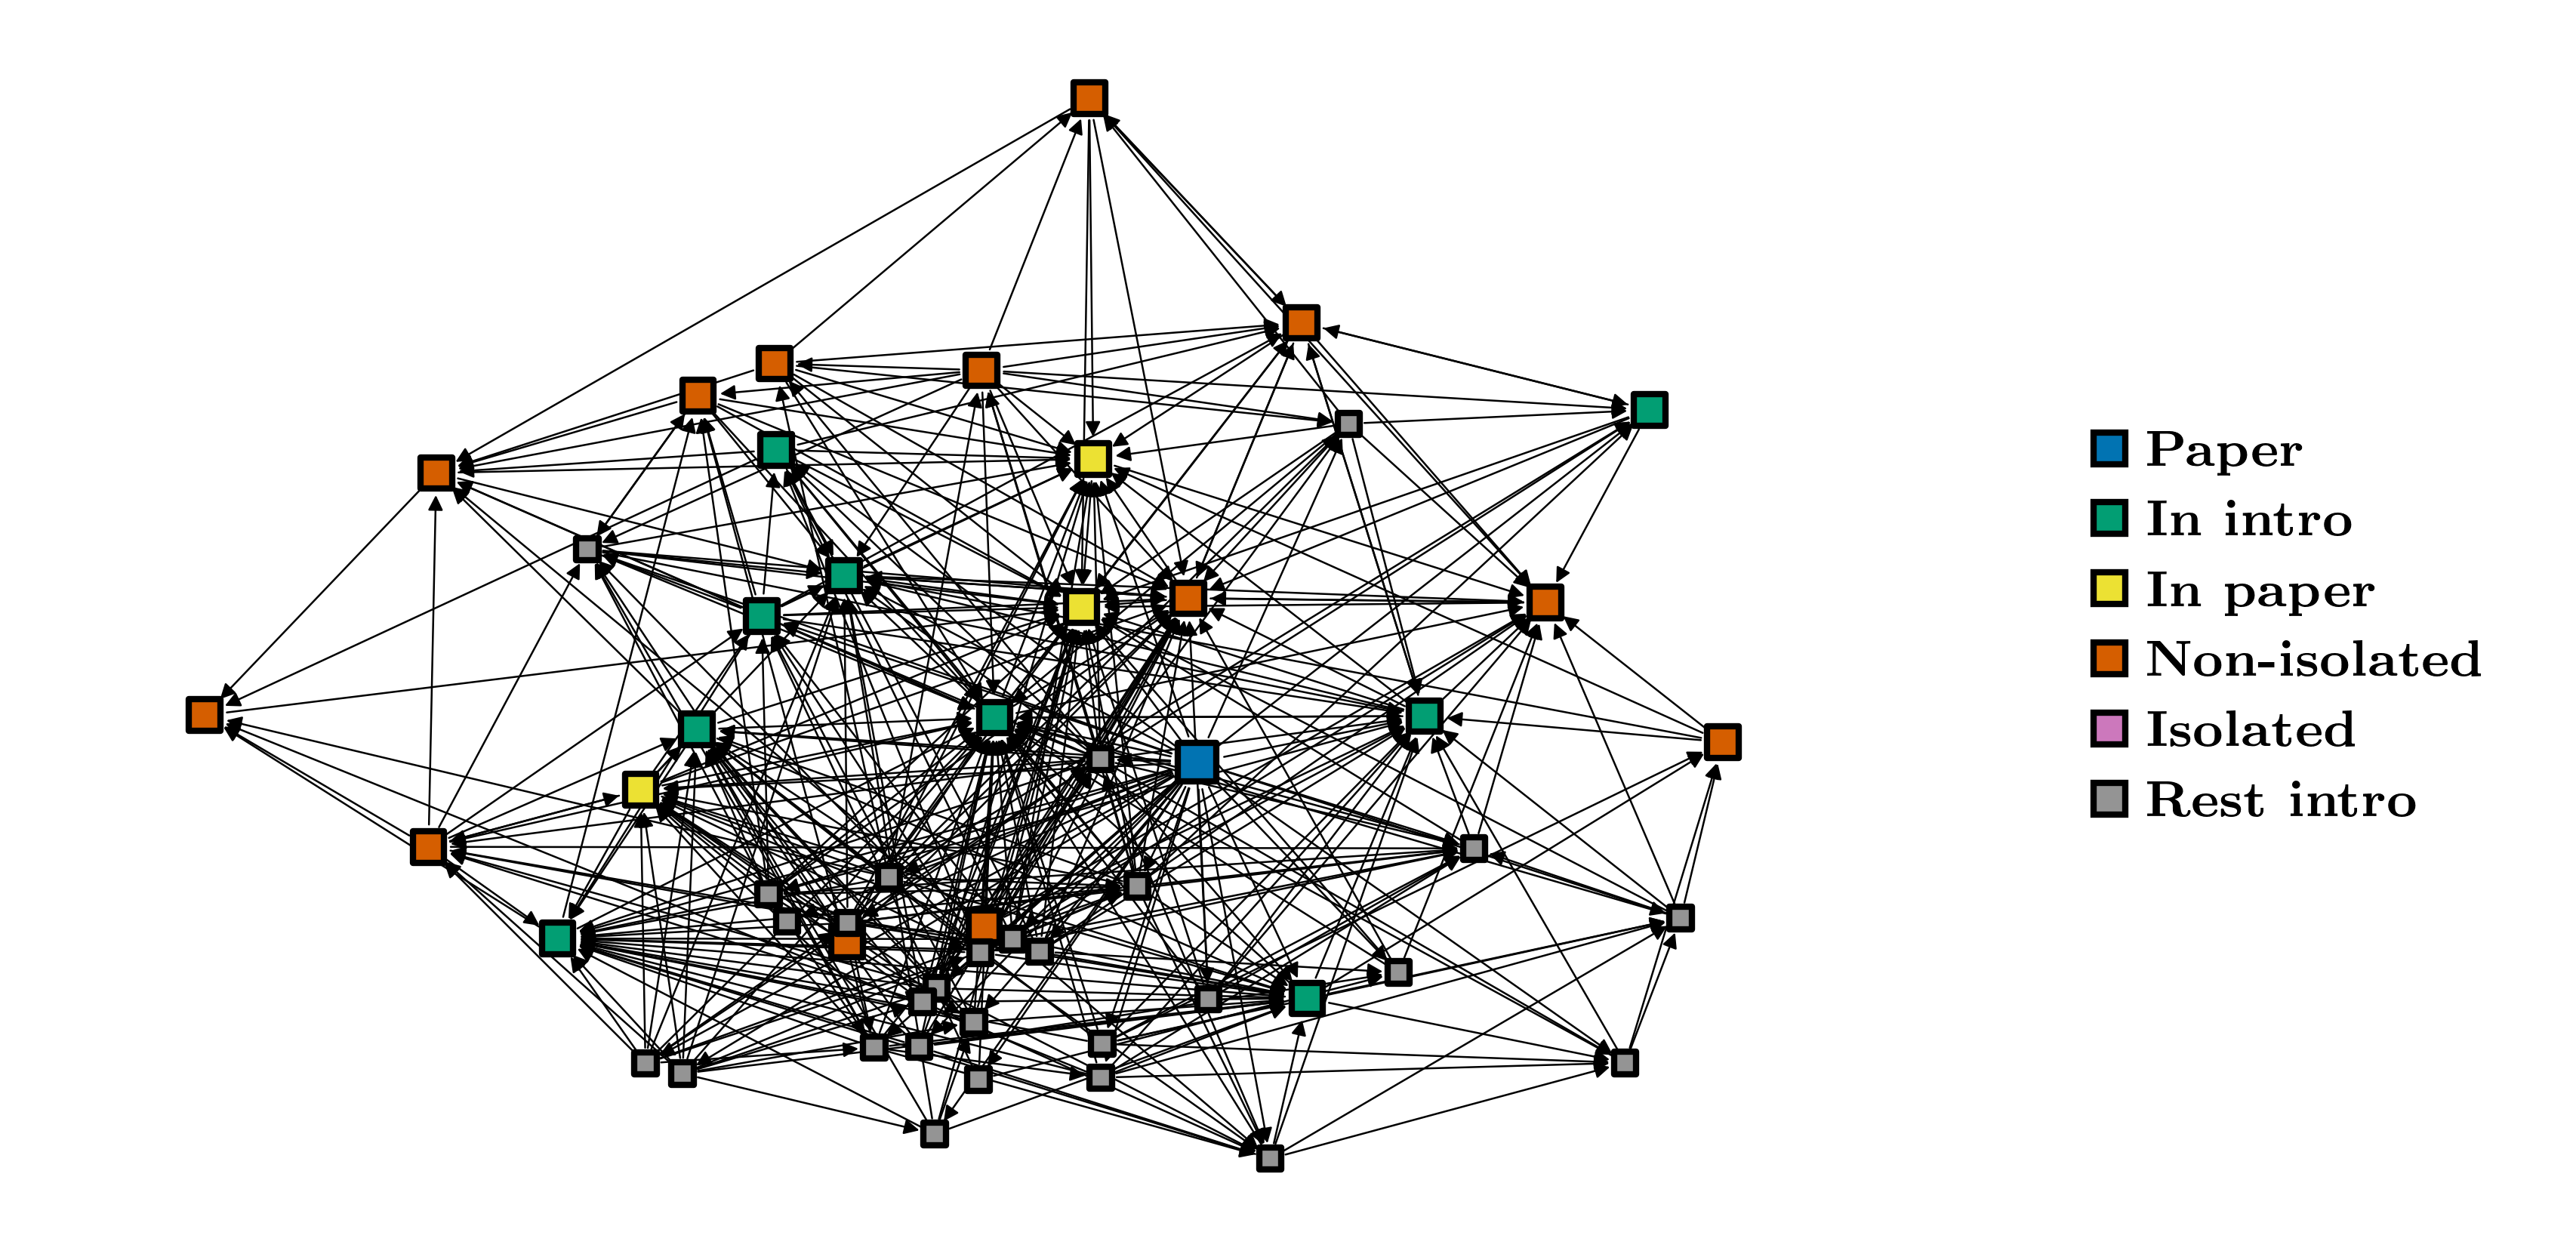

In [5]:
fig, ax = plt.subplot_mosaic(
                            [
                            ['A']
                            ],
                            figsize=(7.08,6.69/2),
                            gridspec_kw = {'width_ratios':[1],'height_ratios': [1]},
                            dpi = 600
                            )

#Set up the list of original paper ids
original_papers=list(graphs.keys())

#Choose the focal paper to be displayed and extract its citation graph
paper='08d955fc4a6f90fb90640004e8138694de68286a'
dic=graphs[paper]
G=nx.DiGraph()
G.add_nodes_from(dic['nodes'])
G.add_edges_from(dic['edges'])

#Create a GridSpec within 'A'
gs = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=ax['A'])

#Create subplots within 'A'

#Plot the central large graph
ax_large = fig.add_subplot(gs[0:2, 0:3])  
positions=nx.kamada_kawai_layout(G)
nx.draw(G, 
        nodelist=dic['nodes'], 
        pos=positions, 
        node_color=dic['node_color'], 
        edgecolors='black',
        arrowsize=5, 
        width=0.3, 
        alpha=1, 
        node_size=[0.25*x for x in dic['node_size']],
        node_shape='s',
        ax=ax_large
        )

#Set margins close to 0 to avoid whitespace
ax_large.margins(x=0.05, y=0)

#Add legend to ax on the middle left 

color_dic={'b': sns.color_palette('colorblind')[0],
                  'g': sns.color_palette('colorblind')[2],
                  'y': sns.color_palette('colorblind')[8],
                  'r': sns.color_palette('colorblind')[3],
                  'm': sns.color_palette('colorblind')[4],
                  'k': sns.color_palette('colorblind')[7]
                  }

ax_legend=fig.add_subplot(gs[0:2, 3])
markersize=5
legend_elements = [
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Paper}', markerfacecolor=color_dic['b'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1), 
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{In intro}', markerfacecolor=color_dic['g'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{In paper}', markerfacecolor=color_dic['y'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Non-isolated}', markerfacecolor=color_dic['r'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Isolated}', markerfacecolor=color_dic['m'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Rest intro}', markerfacecolor=color_dic['k'],
                markeredgecolor='black', 
                markersize=markersize, alpha=1),
    ]

#Set fontsize of legend
ax_legend.legend(handles=legend_elements,
                loc='right',
                frameon=False,
                handlelength=0.5,
                handletextpad=0.5,  
                prop={'size': 8}
                )

ax_legend.set_axis_off()

#Despine figure
sns.despine(fig, left=True, bottom=True)
#Remove xticks and yticks
ax['A'].set_xticks([])
ax['A'].set_yticks([])

plt.show()

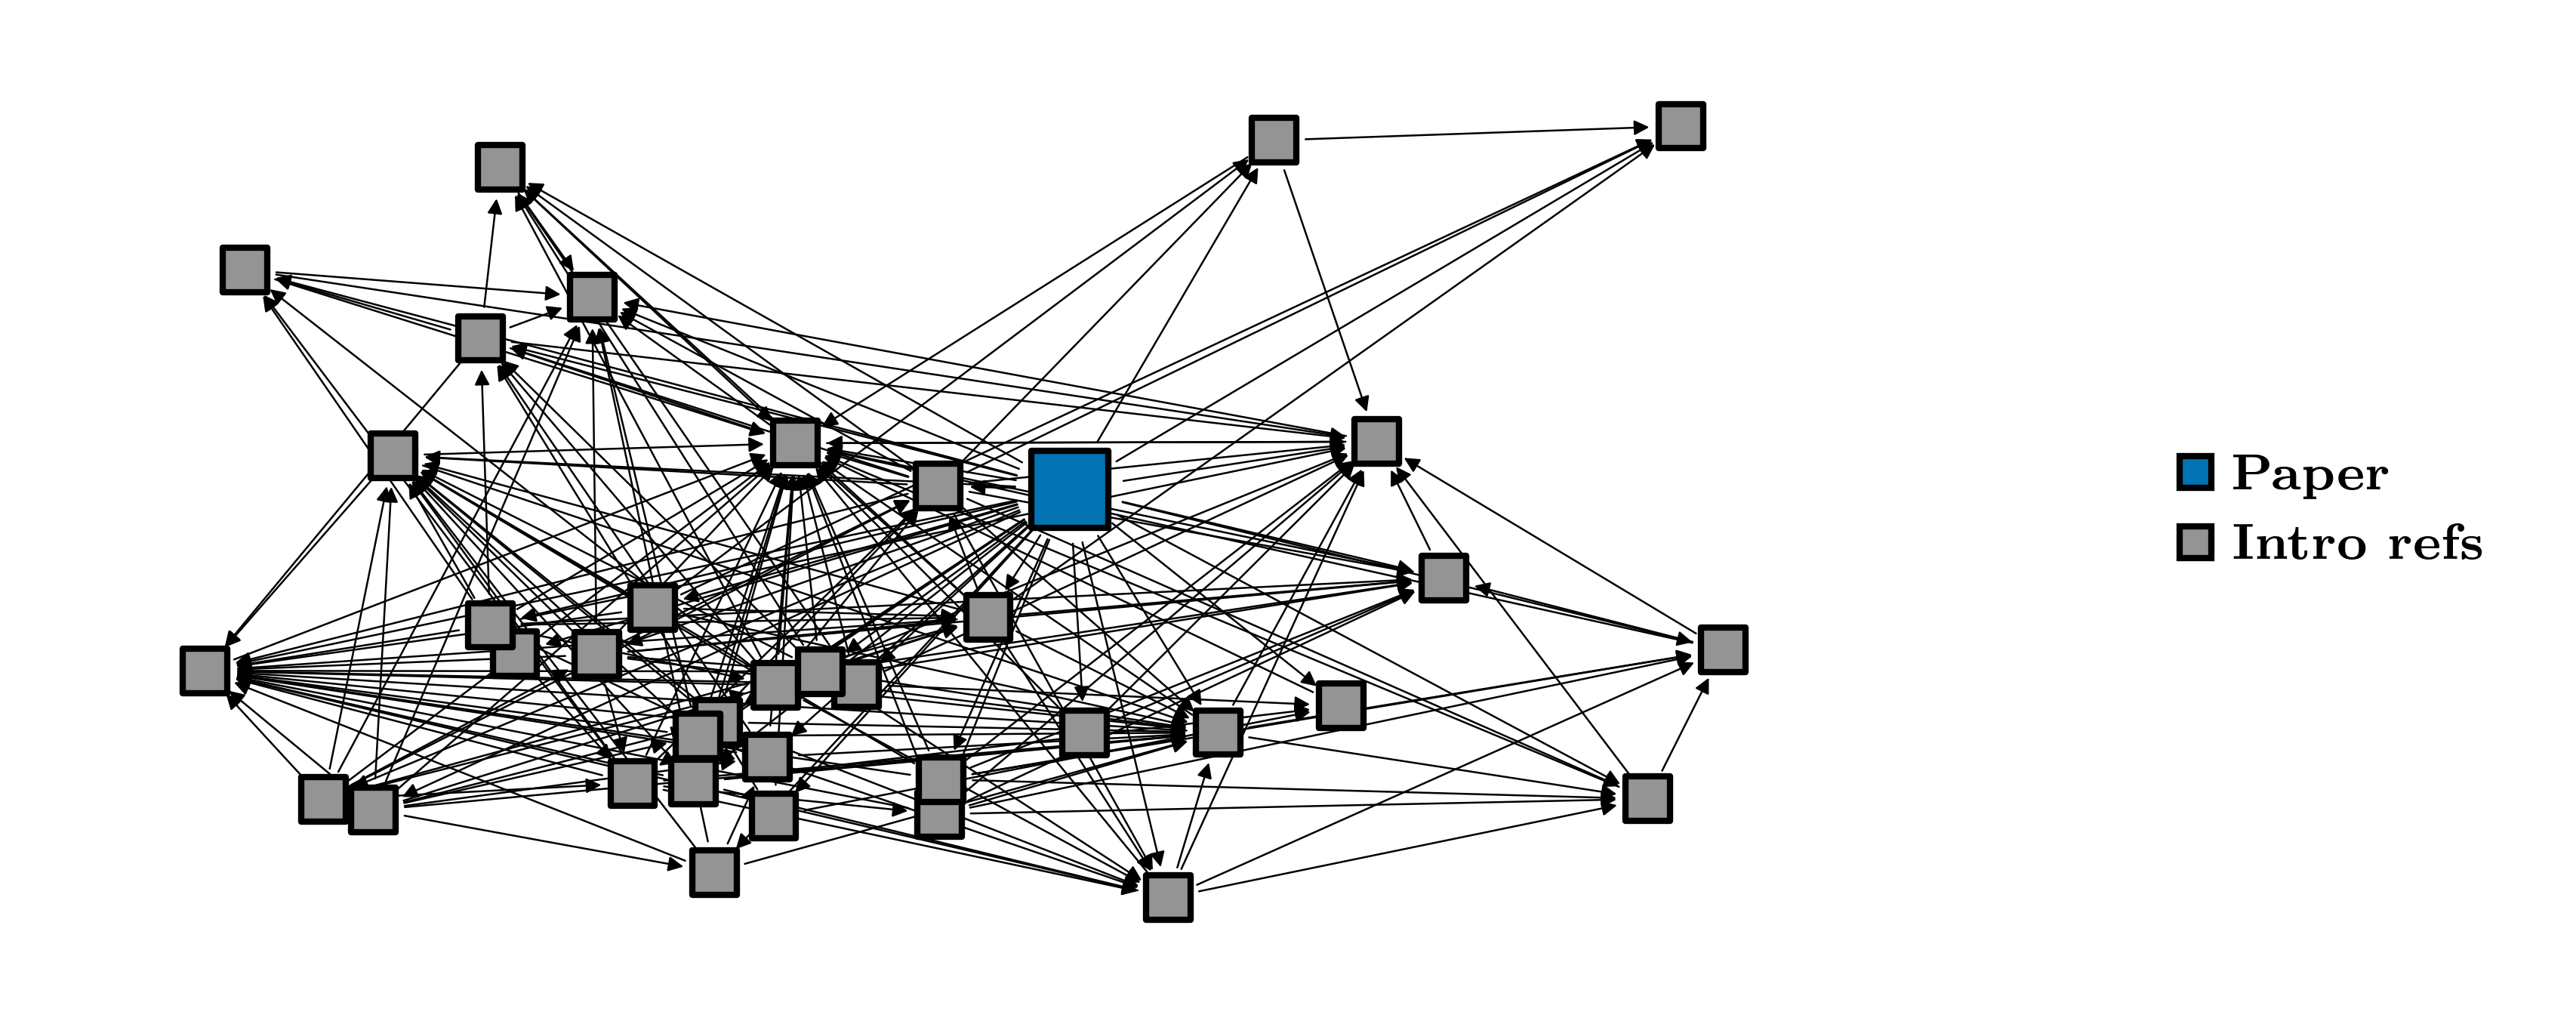

In [6]:
#For the graph we display in the main paper, extract the subgraph of the true introduction references plus the focal paper
#drawn with the same positions as the original graph

fig, ax = plt.subplot_mosaic(
                            [
                            ['A']
                            ],
                            figsize=(7.08,6.69/2.5),
                            gridspec_kw = {'width_ratios':[1],'height_ratios': [1]},
                            dpi = 600
                            )

#Create a GridSpec within 'A'
gs = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=ax['A'])

color_dic={'b': sns.color_palette('colorblind')[0],
                  'g': sns.color_palette('colorblind')[2],
                  'y': sns.color_palette('colorblind')[8],
                  'r': sns.color_palette('colorblind')[3],
                  'm': sns.color_palette('colorblind')[4],
                  'k': sns.color_palette('colorblind')[7]
                  }

#Filter for nodes in the actual introduction, i.e. for blue, green and gray nodes 
mask=[x in [color_dic['b'], color_dic['g'], color_dic['k']] for x in dic['node_color']]

#Extract node color of intro nodes
node_color_intro=[dic['node_color'][i] for i, x in enumerate(mask) if x]
#If color is green, make it grey
node_color_intro=[color_dic['k'] if x==color_dic['g'] else x for x in node_color_intro]

#Extract intro node sizes
node_size_intro=[dic['node_size'][i] for i, x in enumerate(mask) if x]
#If node size is 100, make it 50
node_size_intro=[50 if x==100 else x for x in node_size_intro]

#Extract intro nodes
nodes_intro=[dic['nodes'][i] for i, x in enumerate(mask) if x]
#Extract the positions of the nodes in the introduction
positions_intro={k: positions[k] for k in nodes_intro}

#Get the subgraph of the introduction nodes and edges
H=G.subgraph(nodes_intro)

#Plot the central large graph
ax_large = fig.add_subplot(gs[0:2, 0:3])  

#Draw the introduction nodes and edges 
nx.draw(H, 
        nodelist=nodes_intro, 
        pos=positions_intro, 
        node_color=node_color_intro, 
        node_size=node_size_intro, 
        edgecolors='black',
        arrowsize=5, 
        width=0.3, 
        alpha=1, 
        node_shape='s',
        ax=ax_large
        )

#Add legend to ax on the middle left 

color_dic={'b': sns.color_palette('colorblind')[0],
                  'k': sns.color_palette('colorblind')[7]
                  }

ax_legend=fig.add_subplot(gs[0:2, 3])
markersize=5
legend_elements = [
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Paper}', markerfacecolor=color_dic['b'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1), 
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Intro refs}', markerfacecolor=color_dic['k'],
                markeredgecolor='black', 
                markersize=markersize, alpha=1),
    ]

#Set fontsize of legend
ax_legend.legend(handles=legend_elements,
                loc='right',
                frameon=False,
                handlelength=0.5,
                handletextpad=0.5,  
                prop={'size': 8}
                )

ax_legend.set_axis_off()

#Despine figure
sns.despine(fig, left=True, bottom=True)
#Remove xticks and yticks
ax['A'].set_xticks([])
ax['A'].set_yticks([])

plt.show()

## Main Figure 5

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_23674/4002290943.py:329: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['F'].set_xticklabels(['In intro', 'In paper', 'Non-isolated', 'Isolated'])


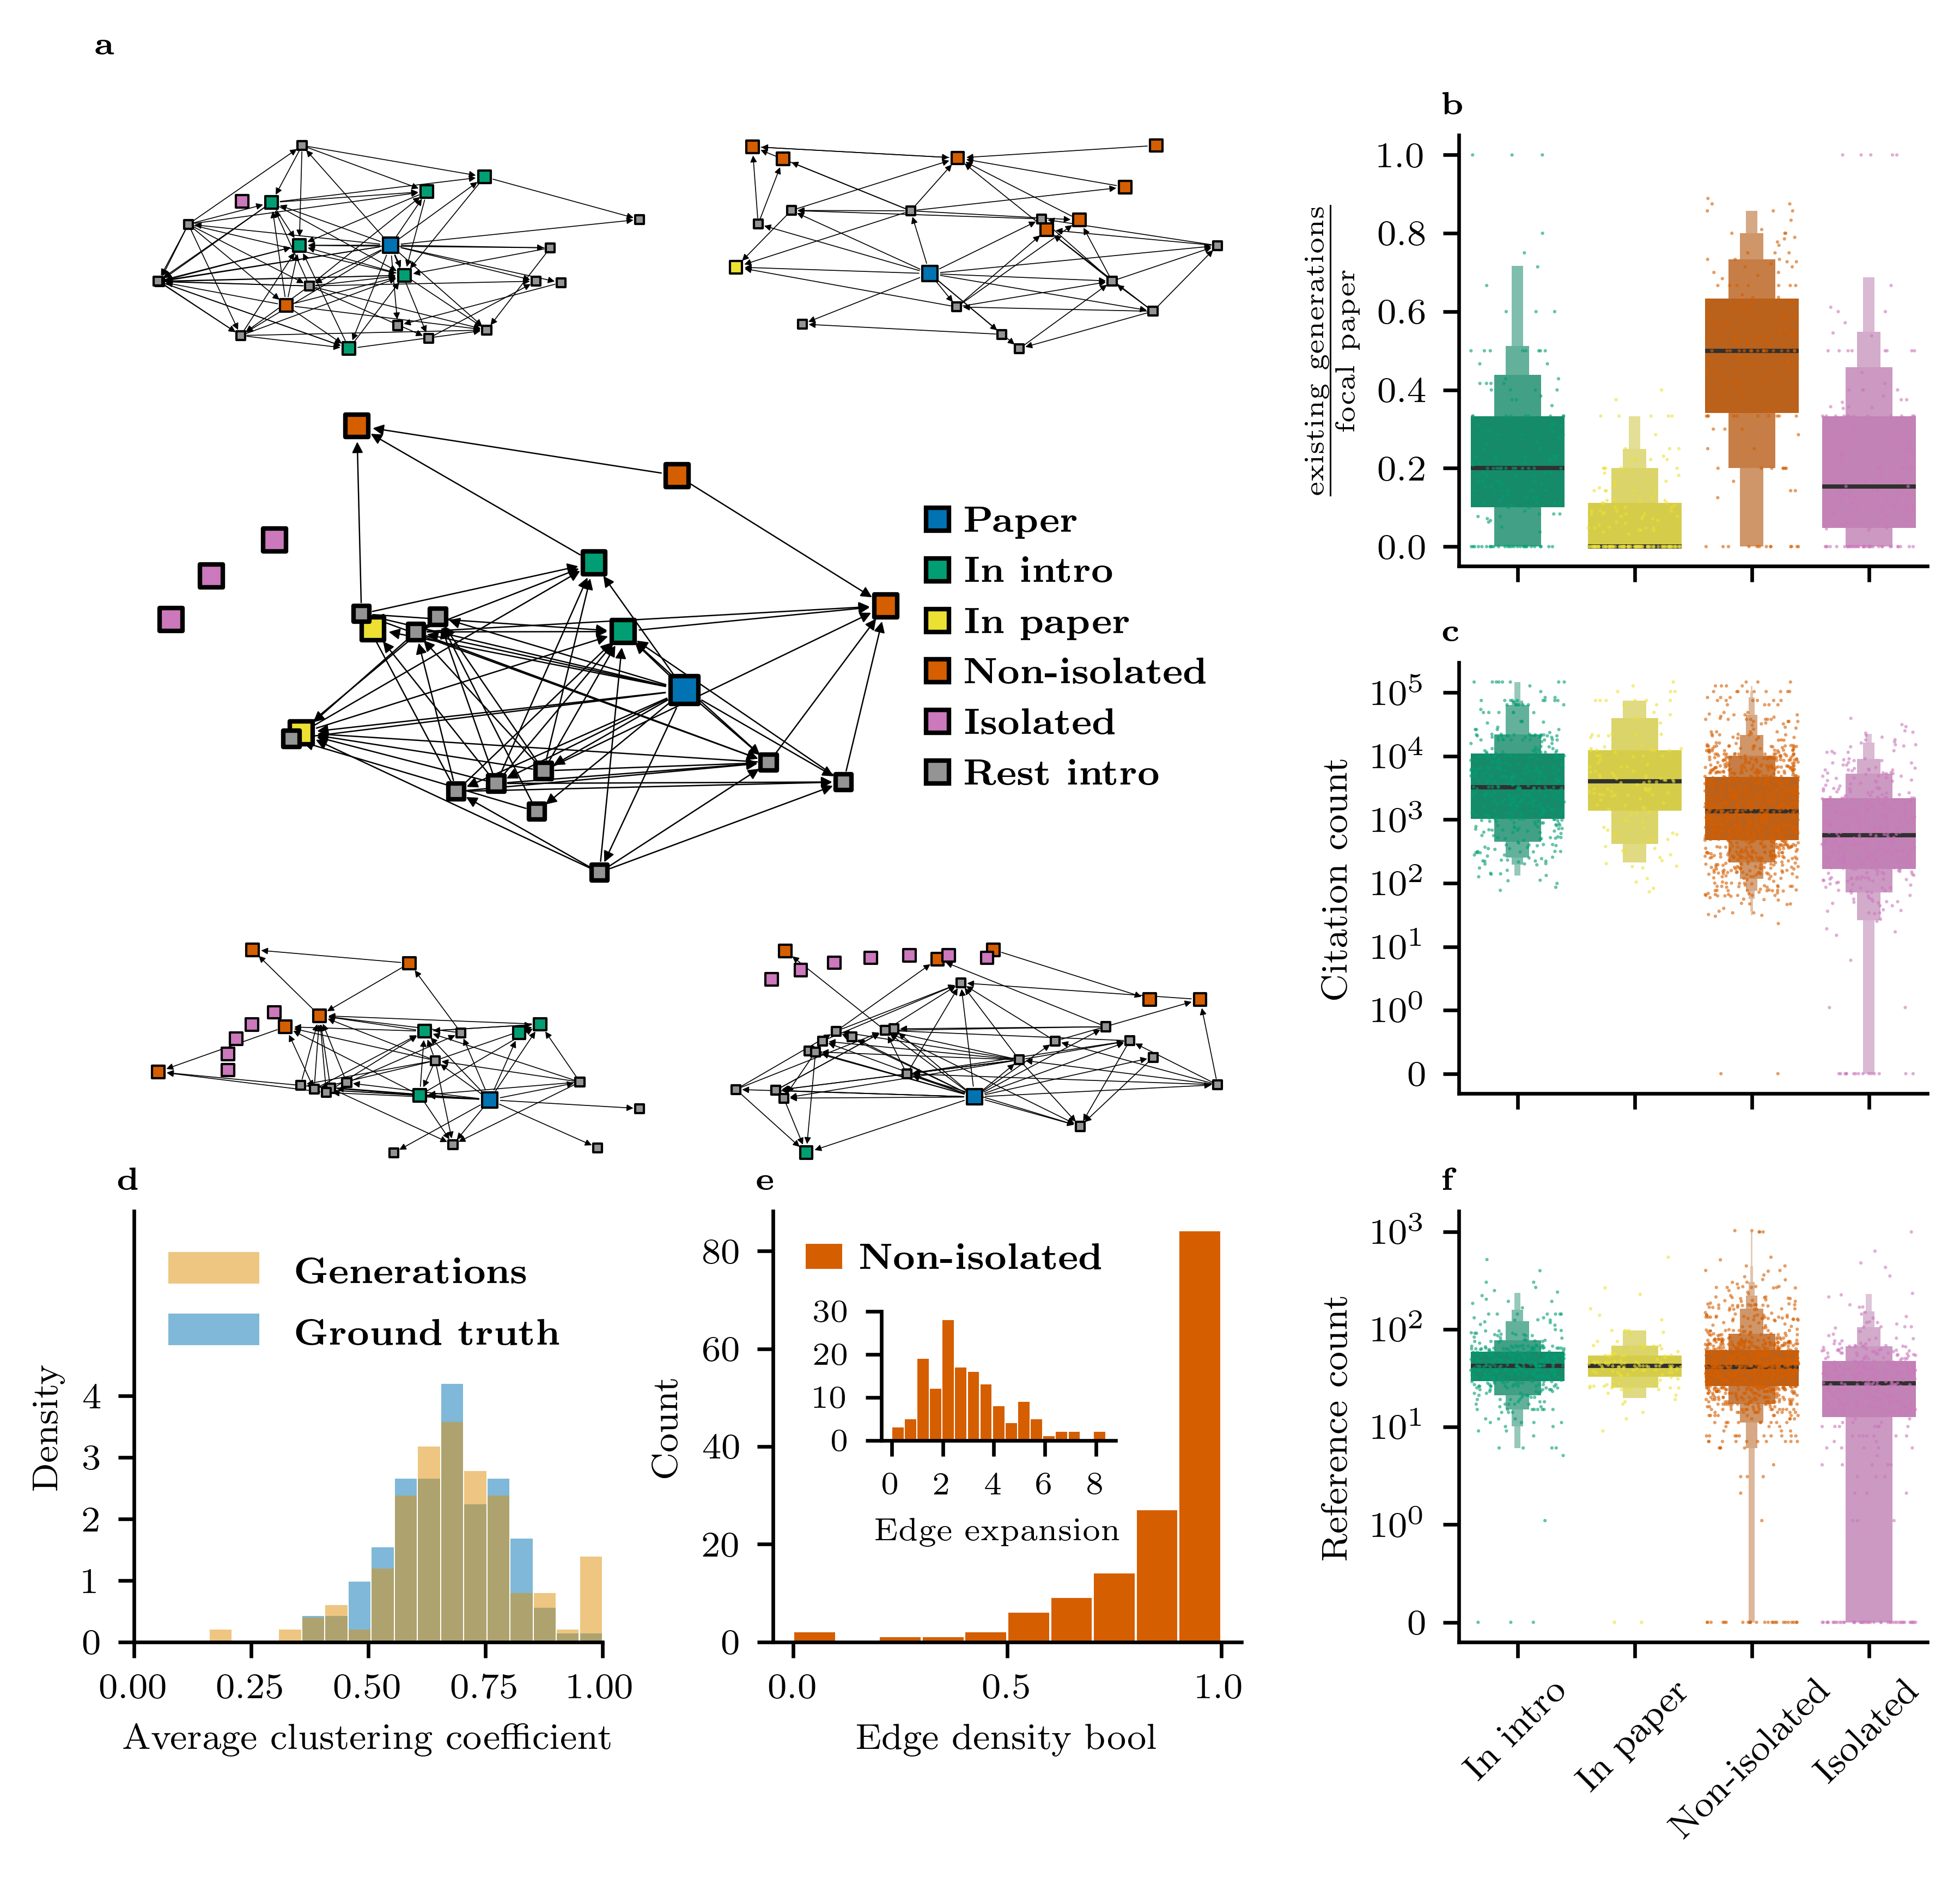

In [7]:
#Figure 4 with reference count instead of fields of study 
fig, ax = plt.subplot_mosaic(
                            [
                            ['A', 'A', 'A', '.', 'B'],
                            ['A', 'A', 'A', '.', '.'],
                            ['A','A', 'A', '.', 'C'],
                            ['A', 'A', 'A', '.', '.'],
                            ['D', '.', 'E', '.', 'F'],
                            ['.', '.', '.', '.', '.']
                            ],
                            figsize=(7.08,6.69),
                            gridspec_kw = {'width_ratios':[1, 0.1 , 1, 0.2, 1],'height_ratios': [1, 0, 1, 0.05, 1, 0.3]},
                            dpi = 600
                            )

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams['text.usetex'] = True

# annotations
annotations = {
    'A': r'\textbf{a}',
    'B': r'\textbf{b}',
    'C': r'\textbf{c}',
    'D': r'\textbf{d}',
    'E': r'\textbf{e}',
    'F': r'\textbf{f}',
}
 
# Annotate each subplot
for key, axis in ax.items():
    axis.text(-0.035, 1.10, annotations[key], transform=axis.transAxes,
            fontsize=7, fontweight='bold', va='top', ha='left')
    
#For each axis in ax set the fontsize of the x and y labels to 8
for key, axis in ax.items():
    axis.tick_params(axis='both', which='major', labelsize=8)
    axis.tick_params(axis='both', which='minor', labelsize=8)
    axis.set_xlabel(axis.get_xlabel(), fontsize=8)
    axis.set_ylabel(axis.get_ylabel(), fontsize=8)

#-----------------------------------A-----------------------------------
#CITATION GRAPHS 

#Create a GridSpec within 'A'
gs = gridspec.GridSpecFromSubplotSpec(4, 4, subplot_spec=ax['A'])

#Create subplots within 'A'

#Set up the list of original paper ids
original_papers=list(graphs.keys())

#Choose the focal paper to be displayed and extract its citation graph
#paper=original_papers[27]
paper='4b6f6f69d6400d4f0daa6a174b33925bb76696c1'
dic=graphs[paper]
G=nx.DiGraph()
G.add_nodes_from(dic['nodes'])
G.add_edges_from(dic['edges'])

#Plot the central large graph
ax_large = fig.add_subplot(gs[1:3, 0:3])  
nx.draw(G, 
        nodelist=dic['nodes'], 
        pos=nx.kamada_kawai_layout(G), 
        node_color=dic['node_color'], 
        edgecolors='black',
        arrowsize=5, 
        width=0.3, 
        alpha=1, 
        node_size=[0.25*x for x in dic['node_size']],
        node_shape='s',
        ax=ax_large
        )

#Set margins close to 0 to avoid whitespace
ax_large.margins(x=0.05, y=0)

#Add legend to ax on the middle left 

color_dic={'b': sns.color_palette('colorblind')[0],
                  'g': sns.color_palette('colorblind')[2],
                  'y': sns.color_palette('colorblind')[8],
                  'r': sns.color_palette('colorblind')[3],
                  'm': sns.color_palette('colorblind')[4],
                  'k': sns.color_palette('colorblind')[7]
                  }

ax_legend=fig.add_subplot(gs[1:3, 3])
markersize=5
legend_elements = [
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Paper}', markerfacecolor=color_dic['b'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1), 
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{In intro}', markerfacecolor=color_dic['g'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{In paper}', markerfacecolor=color_dic['y'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Non-isolated}', markerfacecolor=color_dic['r'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Isolated}', markerfacecolor=color_dic['m'], 
               markeredgecolor='black', 
               markersize=markersize, alpha=1),
        Line2D([0], [0], marker='s', color='w', label=r'\textbf{Rest intro}', markerfacecolor=color_dic['k'],
                markeredgecolor='black', 
                markersize=markersize, alpha=1),
    ]

#Set fontsize of legend
ax_legend.legend(handles=legend_elements,
                loc='right',
                frameon=False,
                handlelength=0.5,
                handletextpad=0.5,  
                prop={'size': 8}
                )

ax_legend.set_axis_off()

#Smaller graphs
#List of positions for the smaller graphs
positions=[(0, [0,2]), (0, [2,4]), (3, [0,2]), (3, [2,4])]

#Choose 4 representative papers to display 
papers_to_display=[
                   'da5fcb26c830663b79c9aa1c550ae62e7725fcad',
                   '1c7d3a359f4029e5384d784ce118ab53e71877b6',
                   '54b2c1035b4da593e62f6658a6e064a56c743c16', 
                   'aae382fe95b061018f214b1f101c55b6f4ae176b'
                   ]

for pos, paper in zip(positions, papers_to_display):
    ax_small = fig.add_subplot(gs[pos[0], pos[1][0]:pos[1][1]])
    dic=graphs[paper]
    G=nx.DiGraph()
    G.add_nodes_from(dic['nodes'])
    G.add_edges_from(dic['edges'])
    nx.draw(G, 
            nodelist=dic['nodes'], 
            pos=nx.kamada_kawai_layout(G), 
            node_color=dic['node_color'], 
            edgecolors='black',
            linewidths=0.5,
            arrowsize=3, 
            width=0.2, 
            alpha=1, 
            node_size=[0.075*x for x in dic['node_size']],
            node_shape='s',
            ax=ax_small
            )
    #Set margins to 0 to avoid whitespace
    ax_small.margins(x=0, y=0)
    
#Remove plot area of axis A
ax['A'].set_axis_off()

#-----------------------------------B-----------------------------------
#FRACTIONS OF GENERATIONS PER FOCAL PAPER 

results_graph['isolated_predictions_fraction']=results_graph['isolated_predictions']/results_graph['total_predictions']
results_graph['in_introduction_predictions_fraction']=results_graph['in_introduction_predictions']/results_graph['total_predictions']
results_graph['in_paper_predictions_fraction']=(results_graph['in_paper_predictions']-results_graph['in_introduction_predictions'])/results_graph['total_predictions']
results_graph['non_isolated_predictions_fraction']=results_graph['wrong_predictions']/results_graph['total_predictions']

#Convert the added columns above to long format 
results_graph_2=pd.melt(results_graph, 
                      id_vars=['id_sch', 'total_predictions'], 
                      value_vars=['isolated_predictions_fraction', 'in_introduction_predictions_fraction', 'in_paper_predictions_fraction', 'non_isolated_predictions_fraction'], 
                      var_name='prediction_type', 
                      value_name='fraction')

#Rename the prediction types to 'in intro', 'in paper', 'non-isolated', 'isolated'

results_graph_2['prediction_type']=results_graph_2['prediction_type'].replace('isolated_predictions_fraction', 'isolated')
results_graph_2['prediction_type']=results_graph_2['prediction_type'].replace('in_introduction_predictions_fraction', 'in intro')
results_graph_2['prediction_type']=results_graph_2['prediction_type'].replace('in_paper_predictions_fraction', 'in paper')
results_graph_2['prediction_type']=results_graph_2['prediction_type'].replace('non_isolated_predictions_fraction', 'non-isolated')

sns.stripplot(data=results_graph_2, 
             x='prediction_type',
             y='fraction',
             hue='prediction_type',
             order=HUE_ORDER,
             hue_order=HUE_ORDER,
             palette=HUE_COLOR,
             edgecolor=None,  
             linewidth=0,
             alpha=0.6,
             jitter=0.4,
             size=0.75,
             legend=None,
             ax=ax['B']
             )

sns.boxenplot(data=results_graph_2, 
             x='prediction_type',
             y='fraction',
             hue='prediction_type',
             order=HUE_ORDER,
             hue_order=HUE_ORDER,
             palette=HUE_COLOR,
             showfliers=False,
             edgecolor=None,  
             legend=None,
             ax=ax['B']
             )

#Remove x-axis labels
ax['B'].set_xticklabels([])
ax['B'].set_xlabel('')

#Set y-axis label
ax['B'].set_ylabel(r'$\frac{\mathrm{existing~generations}}{\mathrm{focal~paper}}$')

#Set y-axis ticks
ax['B'].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1], 
           ['0.0','0.2','0.4', '0.6', '0.8', '1.0']
          )

#Remove axis on right, top and bottom 
ax['B'].spines['right'].set_visible(False)
ax['B'].spines['top'].set_visible(False)


#-----------------------------------C-----------------------------------
#CITATION COUNT OF GENERATED REFERENCES PER DESCRIPTION CATEGORY

mask=results2['Exists']==1.0
results2['Citation Count_log']=results2['Citation Count_sch']+0.1

sns.stripplot(data=results2[mask],
             y='Citation Count_log',
             x='description',
             log_scale=True,
             hue='description',
             order=HUE_ORDER,
             hue_order=HUE_ORDER,
             palette=HUE_COLOR,
             edgecolor=None, 
             linewidth=0,
             alpha=0.6,
             jitter=0.4,
             size=0.75,
             legend=None,
             ax=ax['C']
             )

sns.boxenplot(data=results2[mask],
            y='Citation Count_log',
            x='description',
            log_scale=True,
            hue='description',
            order=HUE_ORDER,
            hue_order=HUE_ORDER,
            palette=HUE_COLOR,
            showfliers=False,
            edgecolor=None, 
            legend=None,
            ax=ax['C']
            )
 
#Remove x-axis labels
ax['C'].set_xticklabels([])
ax['C'].set_xlabel('')

#Set y-axis label
ax['C'].set_ylabel('Citation count')

#Set y-axis ticks
ax['C'].set_yticks([0.1, 1, 10, 100, 1000, 10000, 100000], 
           ['0',r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$']
          )

#Remove axis on right, top and bottom 
ax['C'].spines['right'].set_visible(False)
ax['C'].spines['top'].set_visible(False)

#-----------------------------------F-----------------------------------
#REFERENCE COUNT OF GENERATED REFERENCES PER DESCRIPTION CATEGORY

mask=results2['Exists']==1.0
results2['Reference Count_log']=results2['Reference Count_sch']+0.1

sns.stripplot(data=results2[mask],
             y='Reference Count_log',
             x='description',
             log_scale=True,
             hue='description',
             order=HUE_ORDER,
             hue_order=HUE_ORDER,
             palette=HUE_COLOR,
             edgecolor=None,  
             linewidth=0,
             alpha=0.6,
             jitter=0.4,
             size=0.75,
             legend=None,
             ax=ax['F']
             )

sns.boxenplot(data=results2[mask],
            y='Reference Count_log',
            x='description',
            log_scale=True,
            hue='description',
            order=HUE_ORDER,
            hue_order=HUE_ORDER,
            palette=HUE_COLOR,
            showfliers=False,
            edgecolor=None,  
            legend=None,
            ax=ax['F']
            )


#Remove x-axis labels
ax['F'].set_xlabel('')
ax['F'].set_xticklabels([])

#Show x-axis ticks with angle and relabel them
ax['F'].tick_params(axis='x', 
                    rotation=45
                    )

#Rename x-axis ticks so they start with an uppercase letter
ax['F'].set_xticklabels(['In intro', 'In paper', 'Non-isolated', 'Isolated'])

#Set y-axis label
ax['F'].set_ylabel('Reference count')

#Set y-axis ticks
ax['F'].set_yticks([0.1, 1, 10, 100, 1000], 
           ['0', r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$']
          )

#Remove axis on right, top and bottom 
ax['F'].spines['right'].set_visible(False)
ax['F'].spines['top'].set_visible(False)

#-----------------------------------D-----------------------------------
#Plot the average clustering coefficient of the undirected graphs as histogram  

mask1=results_graph['avg_clustering_pred_undir'].isna()
mask2=results_graph['avg_clustering_true_undir'].isna()
generations=results_graph['avg_clustering_pred_undir'][~mask1]
ground_truth=results_graph['avg_clustering_true_undir'][~mask2]

generations = pd.DataFrame({'Average clustering coefficient': generations.values})
ground_truth = pd.DataFrame({'Average clustering coefficient': ground_truth.values})

color_palette = {
    "Generations": sns.color_palette('colorblind')[1],
    "Ground truth": sns.color_palette('colorblind')[0]
}

# Combine the two dataframes with an identifier column
df_combined = pd.concat([generations.assign(dataset='Generations'), ground_truth.assign(dataset='Ground truth')], ignore_index=True)

# Plot
sns.histplot(data=df_combined, 
             x='Average clustering coefficient', 
             common_norm=False, 
             hue='dataset', 
             multiple="layer", 
             stat='density', 
             palette=color_palette, 
             alpha=0.5,
             edgecolor=None,
             shrink=0.95,
             linewidth=1,
             ax=ax['D']
            )

#Set xlim 
ax['D'].set_xlim(0, 1)

#Set ylim to make room for legend 
ax['D'].set_ylim(0, 7)

#Set y-axis ticks
ax['D'].set_yticks(np.arange(0, 4.1, 1))

#Set legend
legend = ax['D'].get_legend()
legend.set_title('')
legend.get_frame().set_linewidth(0.0)
#Set legend labels
legend_labels=[r'\textbf{Generations}', r'\textbf{Ground truth}']
for i, text in enumerate(legend.texts):
    text.set_text(legend_labels[i])
#Reduce fontsize of legend
plt.setp(legend.get_texts(), fontsize='8')

#Remove axis on top and right 
ax['D'].spines['right'].set_visible(False)
ax['D'].spines['top'].set_visible(False)

#-----------------------------------E-----------------------------------
#Plot a histogram of the edge_density bool for the non-isolated generations 
#Fraction of non-isolated generations that are connected to at least one introduction reference per paper/prompt

mask=(results_graph['edge_density_bool'].isna())
sns.histplot(results_graph['edge_density_bool'][~mask], 
             bins=10, 
             label=r'\textbf{Non-isolated}', 
             edgecolor=None,
             legend=True,
             color=sns.color_palette('colorblind')[3], 
             shrink=0.95,
             alpha=1,
             ax=ax['E'],
             )

#Set x-label
ax['E'].set_xlabel('Edge density bool')

#Set y-label
ax['E'].set_ylabel('Count')

#Show legend with smaller fontsize
ax['E'].legend(frameon=False,
               handlelength=1,
               handletextpad=0.5,
               prop={'size': 8, 'weight': 'bold'},
               )

#Remove axis on top and right 
ax['E'].spines['right'].set_visible(False)
ax['E'].spines['top'].set_visible(False)

inset_ax = inset_axes(ax['E'], 
                      width="100%", height="100%", 
                      bbox_to_anchor=(0.28, 0.52, 0.5, 0.3), 
                      bbox_transform=ax['E'].transAxes)

#Plot a histogram of the edge expansion per focal paper  
mask=(results_graph['edge_expansion'].isna())
sns.histplot(results_graph['edge_expansion'][~mask], 
             label='non-isolated predictions',
             binwidth=0.5,
             color=sns.color_palette('colorblind')[3], 
             alpha=1,
             edgecolor=None,
             shrink=0.9,
             legend=None,
             ax=inset_ax,
             )     

#Remove y-axis label
inset_ax.set_ylabel('')

#Set x-axis label with smaller fontsize
inset_ax.set_xlabel('Edge expansion', fontsize=7)

#Set x-axis ticks
inset_ax.set_xticks(np.arange(0, 8.1, 2))
#Set y-axis ticks
inset_ax.set_yticks(np.arange(0, 40, 10))
#Set fontsize of xticks 
plt.setp(inset_ax.get_xticklabels(), fontsize=7)
plt.setp(inset_ax.get_yticklabels(), fontsize=7)

#Remove axis on top and right 
inset_ax.spines['right'].set_visible(False)
inset_ax.spines['top'].set_visible(False)

#Save figure as pdf
plt.savefig(os.path.join(figures_dir, "Main_fig_5.pdf"), dpi=300, bbox_inches='tight')

plt.show()

## Graph generation
CAUTION: Only load if you want to regenerate graphs.

In [ ]:
#Initialize the dataframe for the graph analysis

#Add the graph results to the info file, but only keep columns on title and id
results_graph=info[['title_sch', 
                    'id_sch', 
                    ]
                    ].copy()

#Add columns for the graph invariants we calculate

#_true: graph invariants of the graph that contains the true introduction references with the focal paper removed
#_pred: graph invariants of the graph that contains generated references with the true paper removed 
#_true_pred: graph invariants of the graph that contains both the true and generated introduction references
#_true_pred_2: graph invariants of the graph that contains both the true and generated introduction references with isolated predictions removed

#SUMMARY STATISTICS 

#Self-citation flag that indicates if GPT predicted the paper to cite itself 
results_graph.loc[:,'self_citation']=np.nan

#Total number of correct predictions: we exclude self-citations in the count and count duplicate predictions once
results_graph.loc[:,'total_predictions']=np.nan

#Total number of introduction references of the focal paper: we only count references that have a Semantic Scholar ID
results_graph.loc[:,'total_introduction_references']=np.nan 

#Total number of predictions/ generated references that appear in the introduction (green nodes)
results_graph.loc[:,'in_introduction_predictions']=np.nan

#Total number of predictions/ generated references that appear in the focal paper: we include in introduction predictions in this count (green and yellow nodes)
results_graph.loc[:,'in_paper_predictions']=np.nan

#Total number of predictions/ generated references that don't appear in the paper and are not isolated (orange nodes)
#Note: orange nodes can also be only connected within each other (i.e. isolated from the introduction references)
results_graph.loc[:,'wrong_predictions']=np.nan 

#Total number of isolated predictions/ generated references (purple nodes)
results_graph.loc[:,'isolated_predictions']=np.nan

#Total number of true introduction references (green and grey nodes) that are only connected to original paper and not within each other 
#We only count references that have a Semantic Scholar ID
results_graph.loc[:,'isolated_introduction_references']=np.nan

#----------------------------------------------------------

#GRAPH INVARIANTS

#Average clustering coefficient of the directed graph of predicted/generated vs. true introduction references (we exclude the focal paper)
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html

results_graph.loc[:,'avg_clustering_pred']=np.nan #count_zero=False (don't count isolated nodes)
results_graph.loc[:,'avg_clustering_true']=np.nan #count_zero=False (don't count isolated nodes)

#Average clustering coefficient of the undirected graph of predicted/generated vs. true introduction references (we exclude the focal paper)
results_graph.loc[:,'avg_clustering_pred_undir']=np.nan #count_zero=False (don't count isolated nodes)
results_graph.loc[:,'avg_clustering_true_undir']=np.nan #count_zero=False (don't count isolated nodes)

#----------------------------------------------------------

#RATE PLAUSIBILITY OF PREDICTIONS/ GENERATED REFERENCES
#wrong predictions/genereations that are connected to the introduction references (orange nodes)

#Calculate the number of edges between the non-isolated wrong predictions with the introduction references, divided by the total number of possible edges
results_graph.loc[:,'edge_density']=np.nan 

#Calculate fraction of non-isolated wrong predictions that are connected to at least one paper in the introduction 
results_graph.loc[:,'edge_density_bool']=np.nan 

#Calculate average jaccard coefficient between non-isolated wrong predictions and original focal paper (we exclude the yellow nodes for now)
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_prediction.jaccard_coefficient.html
results_graph.loc[:,'avg_jaccard_coeff']=np.nan 

#Save also individual Jaccard coefficient of non-isolated orange nodes 
results.loc[:,'jaccard_coeff']=np.nan 

#Calculate edge expansion between non-isolated orange nodes and their complement in the graph H (excludes isolated predictions and yellow nodes)
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cuts.edge_expansion.html
#Intuition: average number of edges between orange nodes and actual introduction references we have to remove to disconnect the two sets 
results_graph.loc[:,'edge_expansion']=np.nan 

#----------------------------------------------------------

#DESCRIPTION OF PREDICTIONS/ GENERATED REFERENCES

#Description to see where generated reference appears in graph of introduction references
results.loc[:,'description']=np.nan

In [ ]:
#Draw the graphs for all the original conference papers (focal papers) for which we have results 

for original_index, original_id in enumerate(info['id_sch']):

    #Get title of focal paper (we need it later to access the respective dictionaries of references)
    original_paper=info.at[original_index, 'title_arxiv']

    #Create a dictionary of lists for the true introduction references 
    dictionary_paper_true={}

    #Add the references of the original conference paper as a first entry 
    #Note: We add all the references here and not only the introduction references
    #In doing so, we display the yellow nodes correctly (predictions that appear in paper but not introduction)
    try:
        mask=(full_references['original_id']==original_id)
        reference_list=full_references[mask]['paperId'].values
        #Remove nan entries from the reference list 
        reference_list=[x for x in reference_list if not (isinstance(x, (float, np.float64)) and np.isnan(x))] #note: we can only test np.isnan for a float
        dictionary_paper_true[original_id]=reference_list
    except:
        print(original_id, 'has no reference list.')
        continue
        
    #Add all the introduction references as keys plus their respective references 
    #We use the introduction_references dataframe for this
      
    try:
        mask=(introduction_references['original_id']==original_id)
        introduction_references_paper=introduction_references[mask]
        introduction_references_paper.reset_index(inplace=True)
        for index, id in enumerate(introduction_references_paper['Id']):
            try:
                #Get title of intro reference
                intro_reference=introduction_references_paper.at[index, 'Title_sch']
                #Extract the reference list of the intro_reference from the intro_refs_dict
                reference_list=intro_refs_dict[original_paper][intro_reference].values()
                reference_list=list(reference_list)
                #Remove None entries from the reference list 
                reference_list=[x for x in reference_list if x is not None]
                dictionary_paper_true[id]=reference_list
            except:
                #Add an empty list here because we use .keys() later to retrieve information of all the nodes
                #Only add the entry if id is not nan
                if not (isinstance(id, (float, np.float64)) and np.isnan(id)):
                        dictionary_paper_true[id]=[]
                print('The introduction reference {0} of {1} has no reference list.'.format(id, original_id))
                continue
    except:
        print(original_id, 'has no information on introduction references.')
        continue
        
    #Create a dictionary of lists for the predicted introduction references, the orignal paper is not stored as a key
    #to avoid overwrite issues when we update dictionary_paper_true 
    dictionary_paper_pred={}
    #Add all the predicted introduction references as keys plus their respective references 
    #We use the results dataframe for this
    #Note: Only add a predicted reference to the dictionary if it exists 
    
    try:
        mask=(results['original_id']==original_id)
        results_paper=results[mask]
        results_paper.reset_index(inplace=True)
        for index, id in enumerate(results_paper['Id']):
            #Check if the predicted reference exists 
            if results_paper.at[index, 'Exists']:
                try:
                    #Get title of the generated reference
                    gen_reference=results_paper.at[index, 'Title_sch']
                    #Extract the reference list of the gen_reference from the gen_refs_dict
                    reference_list=gen_refs_dict[original_paper][gen_reference].values()
                    reference_list=list(reference_list)
                    #Remove None entries from the reference list 
                    reference_list=[x for x in reference_list if x is not None]
                    dictionary_paper_pred[id]=reference_list
                except:
                    #Add an empty list here because we use .keys() later to retrieve information of all the nodes
                    dictionary_paper_pred[id]=[]
                    print('The predicted introduction reference {0} of {1} has no reference list.'.format(id, original_id))
                    continue
    except:
        print(original_id, 'has no predicted introduction references.')
        continue
    
    #Merge the two dictionaries to create a dictionary for the whole graph of predictions and true references
    dictionary=dictionary_paper_true.copy()
    #Since the focal paper is not a key in dictionary_paper_pred we have no overwrite issues here 
    dictionary.update(dictionary_paper_pred)
    
    #Get the index of the paperId in the results_graph data frame to store the graph invariants 
    mask=(results_graph['id_sch']==original_id)
    index=results_graph[mask].index[0]
    
    #Calculate how many references predicted/generated by GPT were actually cited in the introduction/ or the whole paper
    
    #All the true references of the focal paper 
    A=set(dictionary_paper_true[original_id])
    #All the true introduction references of the focal paper 
    B=set(list(dictionary_paper_true.keys()))
    B.remove(original_id)
    #All the predicted/generated introduction reference that exist
    #Note: We do remove duplicate predictions in this step 
    C=set(list(dictionary_paper_pred.keys()))
    
    #Check whether GPT predicted the focal paper to cite itself and remove from C if necessary 
    self_citation_flag=(original_id in C)
    if self_citation_flag:
        C.remove(original_id)
    results_graph.at[index, 'self_citation']=self_citation_flag * 1.0
    results_graph.at[index, 'total_predictions']=len(list(C))
    results_graph.at[index, 'total_introduction_references']=len(list(B))
        
    #GRAPH CREATION 

    #List of nodes 
    nodes=[original_id]+list(set.union(B,C))

    #First create the whole graph of true and predicted introduction references  
    G_all=nx.from_dict_of_lists(dictionary, create_using=nx.DiGraph)
    #Subset the whole graph by original paper and it's true and made up references.
    G=subgraph(G_all, nodes)
    G_undir=nx.Graph(G)
    
    #Calculate the subgraph H which does not contain isolated nodes and nodes that appear as reference in paper but not introduction (yellow nodes)
    #--> we will use it for subsequent analysis below

    #Correctly predicted citations which appear in the paper but not the introduction (introduction_flag=False and paper_flag=True)
    almost_correct=list(A&C-B&C)

    H=G.copy()
    H.remove_nodes_from(list(nx.isolates(H)))
    H.remove_nodes_from(almost_correct)
    H=nx.Graph(H)

    #Calculate the graph that corresponds to the true references in the introduction
    #Remove the focal paper from the node list 
    G_true_0=nx.from_dict_of_lists(dictionary_paper_true, create_using=nx.DiGraph)
    #Subset by the papers that appear in the introduction 
    G_true_0=subgraph(G_true_0, list(dictionary_paper_true.keys()))
    #Remove the focal paper from the node list 
    G_true=G_true_0.copy() #otherwise we can't remove the node 
    G_true.remove_nodes_from([original_id])
    G_true_undir=nx.Graph(G_true)
    
    #Calculate the graph that corresponds to the predicted/generated references in the introduction that exist
    #Remove the focal paper by if necessary 
    G_pred=nx.from_dict_of_lists(dictionary_paper_pred, create_using=nx.DiGraph)
    #Subset by the papers that are predicted to appear in the introduction 
    #Note: we use the set C here since we already removed the original conference paper from dictionary_paper_pred.keys() if necessary
    G_pred=subgraph(G_pred, list(C)) 
    #print('Number of nodes in G_pred:', G_pred.number_of_nodes())
    G_pred_undir=nx.Graph(G_pred)
    
    #Note: We don't have to remove the focal paper from the node list, since it is only 
    #part if GPT predicted the paper to cite itself (only happens when paper is purple in drawings)
    
    #COLOURING OF NODES IN THE GRAPH DRAWINGS
    #Blue (b): focal paper
    #Green (g): generated references that appear in the introduction
    #Yellow (y): generated references that appear in the paper but not the introduction
    #Orange (r): generated references that don't appear in the paper but are somehow connected to the true introduction references or other generated references
    #Purple (m): isolated generated references
    #Grey (k): true introduction references not predicted by GPT

    #We calculate the nodelist and color list for the graph drawing below
    nodes=[original_id]
    color=['b']
    #Correctly predicted citations in the introduction (introduction_flag=True)
    correct=list(B&C)
    nodes+=correct
    color+='g'*len(correct)
    results_graph.at[index, 'in_introduction_predictions']=len(correct)
    #Correctly predicted citations which appear in the paper but not the introduction (introduction_flag=False and paper_flag=True)
    almost_correct=list(A&C-B&C)
    nodes+=almost_correct
    color+='y'*len(almost_correct)
    results_graph.at[index, 'in_paper_predictions']=len(correct)+len(almost_correct)
    #Wrongly predicted citations that are not isolated 
    wrong2=list((C-A)-set(nx.isolates(G)))
    nodes+=wrong2
    color+='r'*len(wrong2)
    results_graph.at[index, 'wrong_predictions']=len(wrong2)
    #Isolated predictions
    isolated_predictions=list(set(nx.isolates(G)))
    nodes+=isolated_predictions
    color+='m'*len(isolated_predictions)
    results_graph.at[index, 'isolated_predictions']=len(isolated_predictions)
    #Introduction references not predicted by GPT 4
    not_predict=list(B-C)
    nodes+=not_predict
    color+='k'*len(not_predict)
    
    #Calculate isolated introduction references 
    results_graph.at[index, 'isolated_introduction_references']=len(set(nx.isolates(G_true)))
        
    #Graph invariants 
    
    #1st analysis: generations/ predictions vs. ground truth
    
    # Calculate the average clustering coefficient for directed graphs
    
    try: #avoid division by zero error 
        avg_clustering_pred= nx.average_clustering(G_pred, count_zeros=False)
    except:
        avg_clustering_pred=np.nan
    results_graph.at[index, 'avg_clustering_pred']=avg_clustering_pred
    
    try:
        avg_clustering_true= nx.average_clustering(G_true, count_zeros=False)
    except:
        avg_clustering_true=np.nan
    results_graph.at[index, 'avg_clustering_true']=avg_clustering_true
    
    # Calculate the average clustering coefficient for undirected graphs
    
    try: #avoid division by zero error 
        avg_clustering_pred_undir=nx.average_clustering(G_pred_undir, count_zeros=False)
    except:
        avg_clustering_pred_undir=np.nan
    results_graph.at[index, 'avg_clustering_pred_undir']=avg_clustering_pred_undir
    
    try:
        avg_clustering_true_undir= nx.average_clustering(G_true_undir, count_zeros=False)
    except:
        avg_clustering_true_undir= np.nan
    results_graph.at[index, 'avg_clustering_true_undir']=avg_clustering_true_undir
    
    #2nd analysis: rate plausibility of predictions (focus on non-isolated orange nodes, calculated above)
    
    #Calculate the Jaccard coefficient between each node in wrong2 and the original conference paper 
    #Use it to calculate the average Jaccard coefficient between the non-isolated orange nodes and
    #fraction of nodes in wrong2 that are connected to at least one paper in the introduction
    edge_density_bool=0
    avg_jaccard_coeff=0
    if len(wrong2)!=0:
        for node in wrong2:
            jaccard_coeff=list(nx.jaccard_coefficient(H, [(node, original_id)]))[0][2]
            edge_density_bool+=(jaccard_coeff>0)
            avg_jaccard_coeff+=jaccard_coeff
            #Store the jaccard coefficient also in the results dataframe to get an overall summary statistic and not grouped by prompt
            #Get the index of the node in the results data frame to store the Jaccard coefficient
            #retrieve as index 2 because index is stored for results_graph
            mask1=results['Id']==node 
            mask2=results['original_id']==original_id
            index2=results[mask1&mask2].index[0]
            results.at[index2, 'jaccard_coeff']=jaccard_coeff
            
        edge_density_bool/=len(wrong2)
        avg_jaccard_coeff/=len(wrong2)
    
        results_graph.at[index, 'edge_density_bool']=edge_density_bool
        results_graph.at[index, 'avg_jaccard_coeff']=avg_jaccard_coeff

            
    #Calculate edge expansion of wrong2 and their complement in H (note that H is undirected)
    edge_expansion=0 #set to zero here, so every title contains it, will only be added to results if it can be calculated
    if len(wrong2)!=0:
        edge_expansion=nx.edge_expansion(H, wrong2)
        results_graph.at[index, 'edge_expansion']=edge_expansion        


    #Add description of generated references to results dataframe 

    for Id in list(G_pred.nodes()):
        mask1=results['original_id']==original_id
        mask2=results['Id']==Id
        if Id in correct:
            results.loc[mask1&mask2, 'description']='in intro'
        elif Id in almost_correct:
            results.loc[mask1&mask2, 'description']='in paper'
        elif Id in wrong2:
            results.loc[mask1&mask2, 'description']='non-isolated'
        else:
            results.loc[mask1&mask2, 'description']='isolated'

    #Adapt colors with the color dictionary
    new_color=[color_dic[x] for x in color]
    
    #Add legend 
    legend_elements = [
        Line2D([0], [0], marker='s', color='w', label='Paper', markerfacecolor=color_dic['b'],markeredgecolor='black', markersize=10), 
        Line2D([0], [0], marker='s', color='w', label='In intro', markerfacecolor=color_dic['g'],markeredgecolor='black',  markersize=10),
        Line2D([0], [0], marker='s', color='w', label='In paper', markerfacecolor=color_dic['y'],markeredgecolor='black',  markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Non-isolated', markerfacecolor=color_dic['r'],markeredgecolor='black',  markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Isolated', markerfacecolor=color_dic['m'],markeredgecolor='black',  markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Rest intro', markerfacecolor=color_dic['k'],markeredgecolor='black',  markersize=10),
    ]


    #Make focal paper bigger (150) and rest intro prediction (50) smaller in size 
    size_dic={'b': 150,
                  'g': 100,
                  'y': 100,
                  'r': 100,
                  'm': 100,
                  'k': 50
                  }

    size=[size_dic[x] for x in color]

    nx.draw(G, 
            nodelist=nodes, 
            pos=nx.kamada_kawai_layout(G), 
            node_color=new_color, 
            edgecolors='black',
            arrowsize=5, 
            width=0.4, 
            alpha=0.8, 
            node_size=size,
            node_shape='s'
            )
    
    #Create a dictionary of the respective graph and details how to draw it 
    dictionary_graph={'nodes': nodes,
                      'edges': np.array(G.edges()),
                      'node_color': new_color,
                      'node_size': size}
    
    #Store the dictionary in the graphs dictionary
    graphs[original_id]=dictionary_graph
    
    plt.legend(handles=legend_elements, 
               loc='best',
               frameon=False,
               ) 
        
    plt.title('Edge density bool: {0:.2f}, edge expansion: {1:.2f}'.format(edge_density_bool, edge_expansion))
    plt.savefig('../graphs/run'+ run + '/'+  prompt_style +'/'+original_id+ prompt_style +'.jpeg', 
                dpi=300, 
                bbox_inches='tight') 
    
    plt.show()    

#Save the graphs dictionary as a pickle file
with open('../results/graphs'+ prompt_style + run + engine +'_final.pickle', 'wb') as handle:
    pickle.dump(graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

#Save results_graph dataframe as csv file
results_graph.to_csv('../results/results_graph'+ prompt_style + run + engine +'_final.csv')

#Save results dataframe with added metadata on citation graphs as csv file
results.to_csv('../results/results'+ prompt_style + run + engine +'_graph_metadata_final.csv')